In [2]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt
import pandas as pd
import pprint

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_query = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [6]:
#  3. Convert the June temperatures to a list.
list_june_query = list(june_query)

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_query)
# june_df.set_index("date", inplace = True)
june_df.rename(columns={"tobs":"June Temps"},inplace = True)


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:ylabel='Frequency'>

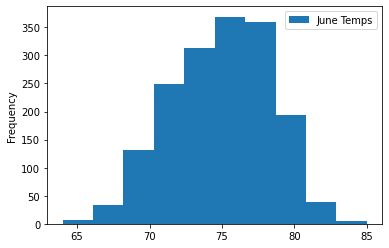

In [9]:
june_df.plot.hist()

## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_query = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [11]:
# 7. Convert the December temperatures to a list.
december_list_data = list(december_query)

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_list_data)
december_df.rename(columns={"tobs":"December Temps"},inplace = True)

In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:ylabel='Frequency'>

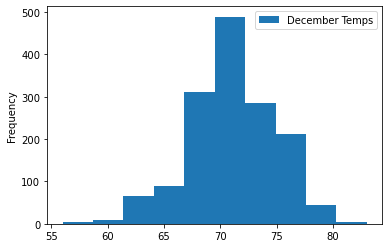

In [14]:
december_df.plot.hist()

In [15]:
my_query = session.query(Measurement.date, Measurement.tobs).all()
my_df = pd.DataFrame(list(my_query))
my_df.rename(columns={"tobs":"All temperatures"},inplace=True)
my_df.describe()

,All temperatures
count,19550.000000
mean,73.097954
std,4.523527
min,53.000000
25%,70.000000
50%,73.000000
75%,76.000000
max,87.000000


<AxesSubplot:ylabel='Frequency'>

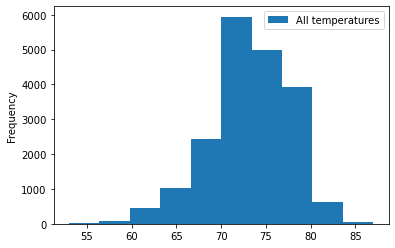

In [16]:
my_df.plot.hist()

<AxesSubplot:ylabel='Frequency'>

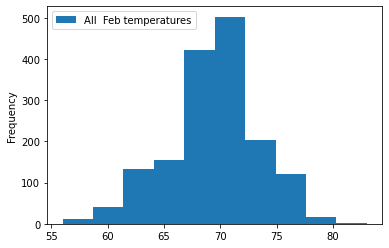

In [24]:
all_7_febuarys = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 2).all()
all_feb_df = pd.DataFrame(list(all_7_febuarys))
all_feb_df.rename(columns={"tobs":"All  Feb temperatures"},inplace=True)
all_feb_df.describe()
all_feb_df.plot.hist()

<AxesSubplot:ylabel='Frequency'>

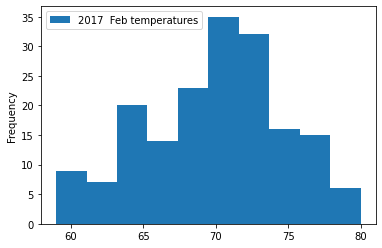

In [25]:
all_7_febuarys = session.query(Measurement.date, Measurement.tobs).filter((extract('month', Measurement.date) == 2) & (extract('year', Measurement.date) == 2017)).all()
all_feb_df = pd.DataFrame(list(all_7_febuarys))
all_feb_df.rename(columns={"tobs":"2017  Feb temperatures"},inplace=True)
all_feb_df.plot.hist()